# Plot whole-brain results
Natalia Vélez, April 2022

In [31]:
%matplotlib inline

import os, sys, re
import pandas as pd
import numpy as np
from nilearn import image,plotting
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as opj
from scipy.io import loadmat

sys.path.append('..')
from utils import gsearch, str_extract

sns.set_style('white')
sns.set_context('talk')

Group contrast maps:

In [2]:
# result directory
result_dir = '../../BIDS_data/derivatives/glm/group/task-teaching_model-parametricnonortho/'

# search for contrast images
con_imgs = gsearch(result_dir, '**', 'spmT*')
con_imgs.sort()
print(*con_imgs, sep='\n')

../../BIDS_data/derivatives/glm/group/task-teaching_model-parametricnonortho/con-0001/spmT_0001.nii
../../BIDS_data/derivatives/glm/group/task-teaching_model-parametricnonortho/con-0002/spmT_0001.nii


Load contrast images:

In [ ]:
for f in con_imgs:
    # get contrast label from SPM file
    spm_file = re.sub(r'[a-zA-Z_0-9]+\.nii', 'SPM.mat', f)
    spm = loadmat(spm_file)
    con_label = spm['SPM']['xCon'][0][0][0][0]['name'][0]
    con_name = str_extract(r'pTrue|KL', con_label)
    con_name_tidy = {'pTrue': 'Posterior belief in true hypothesis', 'KL': 'Belief update'}

    # load image
    stat_img = image.load_img(f)

    # threshold + plot
    thresholds = {'p < .001 unc.': 3.421034, 'FWE < 0.05': 6.132879}
    for k,v in thresholds.items():
        plot_title = f'{con_name_tidy[con_name]} ({k})'
        plotting.plot_stat_map(stat_img, threshold=v, title=plot_title)

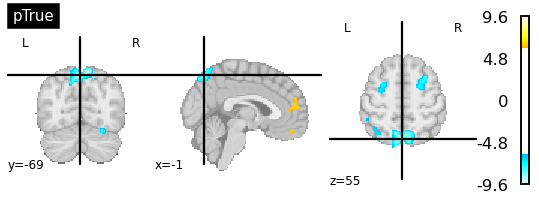

In [43]:
?plotting.plot_stat_map

Signature:
plotting.plot_stat_map(
    stat_map_img,
    bg_img=<MNI152Template>,
    cut_coords=None,
    output_file=None,
    display_mode='ortho',
    colorbar=True,
    cbar_tick_format='%.2g',
    figure=None,
    axes=None,
    title=None,
    threshold=1e-06,
    annotate=True,
    draw_cross=True,
    black_bg='auto',
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x2b99806c4d90>,
    symmetric_cbar='auto',
    dim='auto',
    vmax=None,
    resampling_interpolation='continuous',
    **kwargs,
)
Docstring:
Plot cuts of an ROI/mask image (by default 3 cuts: Frontal, Axial, and
Lateral)

Parameters
----------
stat_map_img : Niimg-like object
    See http://nilearn.github.io/manipulating_images/input_output.html
    The statistical map image

bg_img : Niimg-like object, optional
    See `input_output <http://nilearn.github.io/manipulating_images/input_output.html>`_.
    The background image to plot on top of.
    If nothing is specified, the MNI152 template will b

In [7]:
spm_files = gsearch(result_dir, '**', 'SPM.mat')
spm = loadmat(spm_files[0])

array(['+pTrue, mean'], dtype='<U12')